In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from wordcloud import WordCloud

In [ ]:
# Make graphs for:
"""Binary Features:
telecommuting
has_company_logo
has_questions
fraudulent
location_has_non_latin
description_has_non_latin
requirements_has_non_latin
has_requirements
has_location
has_location_details

Text Features:
title
location
description
requirements
description_and_requirements
country_state
country
"""

In [3]:
df = pd.read_csv("final_data.csv", index_col=0)
df.head()

title            location  \
0                           Marketing Intern    US, NY, New York   
1  Customer Service - Cloud Video Production      NZ, , Auckland   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3          Account Executive - Washington DC  US, DC, Washington   
4                        Bill Review Manager  US, FL, Fort Worth   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI  Environmental Systems Resea...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  telecommuting  \
0  Experience with content management systems a m...              0   
1  What we expect from you:Your key responsibilit...              0   
2  Implement pre-commissioning and commissioning ...              0   
3  EDUCATION:Bachelors or Masters in GIS, busines...              0   
4  QUALIFICATIONS:RN license in the State of Texa...              0   

   has_company_logo  has_questions  fraudulent  location_has_non_latin  \
0                 1              0           0                       0   
1                 1              0           0                       0   
2                 1              0           0                       0   
3                 1              0           0                       0   
4                 1              1           0                       0   

   description_has_non_latin  requirements_has_non_latin  has_requirements  \
0                          0                           0              True   
1                          1                           1              True   
2                          0                           1              True   
3                          1                           1              True   
4                          1                           1              True   

                        description_and_requirements country_state country  \
0  Food52, a fast-growing, James Beard Award-winn...        US, NY      US   
1  Organised - Focused - Vibrant - Awesome!Do you...           NaN      NZ   
2  Our client, located in Houston, is actively se...        US, IA      US   
3  THE COMPANY: ESRI  Environmental Systems Resea...        US, DC      US   
4  JOB TITLE: Itemization Review ManagerLOCATION:...        US, FL      US   

   has_location  has_location_details  
0          True                 False  
1          True                 False  
2          True                 False  
3          True                 False  
4          True                 False

In [ ]:
############################
##### Define Functions #####
############################

In [14]:
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

def preprocess(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    tokens = word_tokenize(text)
    # remove punctuation and stopwords
    cleaned = [
        t for t in tokens
        if t not in punct and t not in stop_words and t.isalpha()
    ]
    return cleaned

In [ ]:
# make preprocessed columns for all text-based columns
df['title_tokens'] = df['title'].apply(preprocess)
df['location_tokens'] = df['location'].apply(preprocess)
df['descr_tokens'] = df['description'].apply(preprocess)
df['requirement_tokens'] = df['requirements'].apply(preprocess)
df['descr_reqt_tokens'] = df['description_and_requirements'].apply(preprocess)
df['country_state_tokens'] = df['country_state'].apply(preprocess)
df['country_tokens'] = df['country'].apply(preprocess)

# cols is list of all text-based columns
cols = ['title_tokens', 'location_tokens', 'descr_tokens', 'requirement_tokens', 
                      'descr_reqt_tokens','country_state_tokens','country_tokens']

Processing column: title_tokens


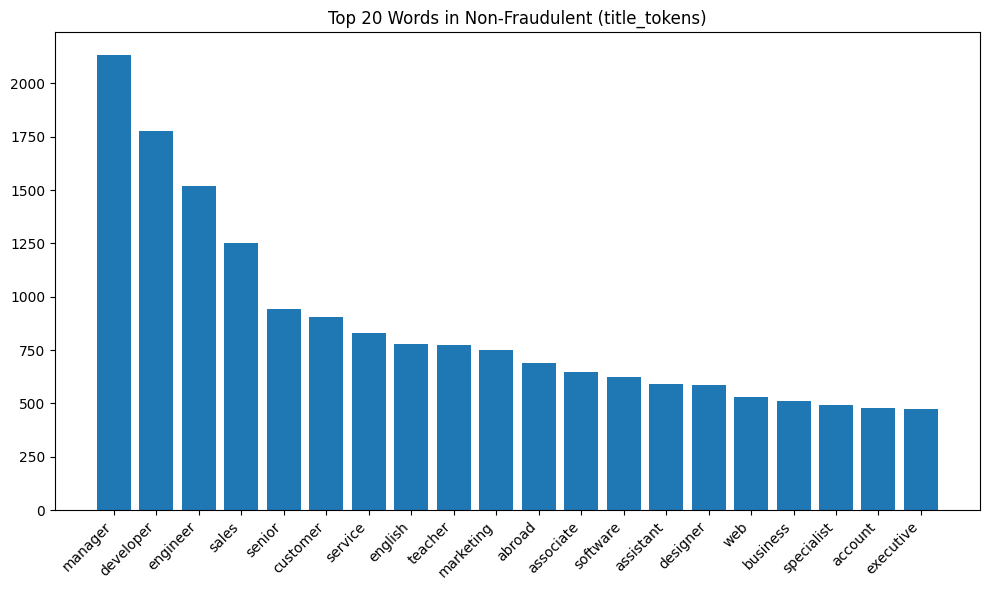

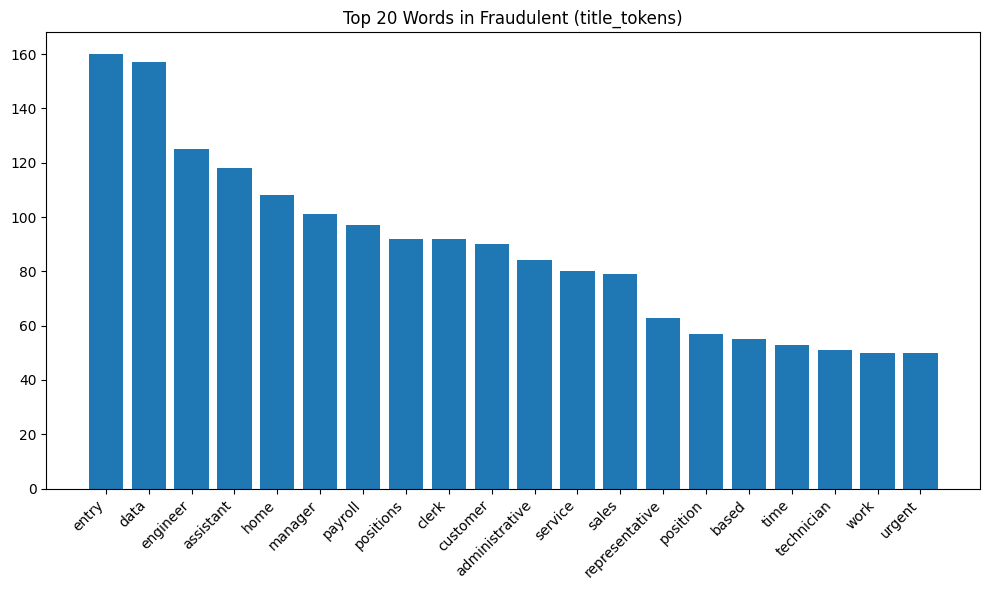

Processing column: location_tokens


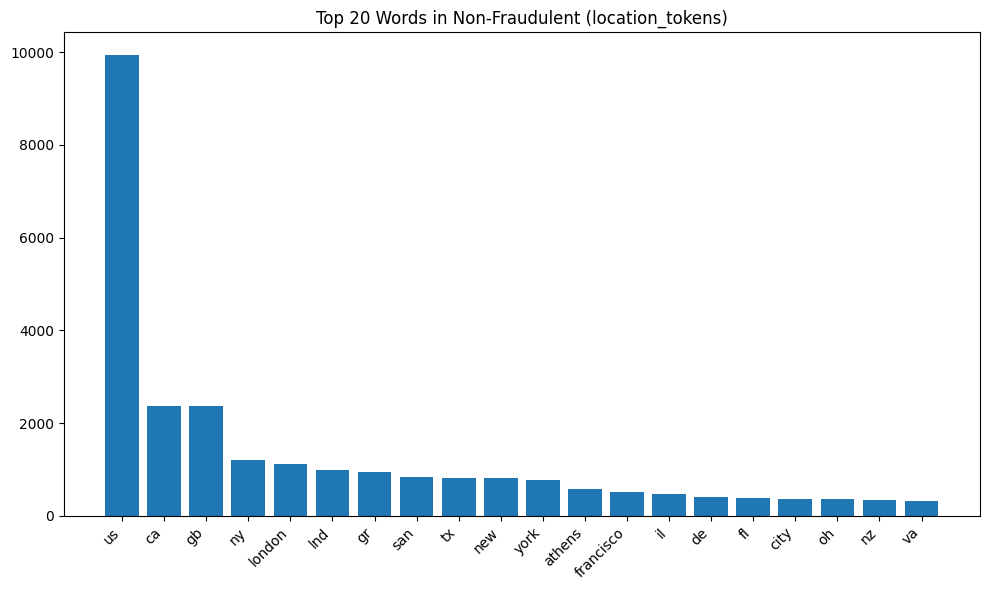

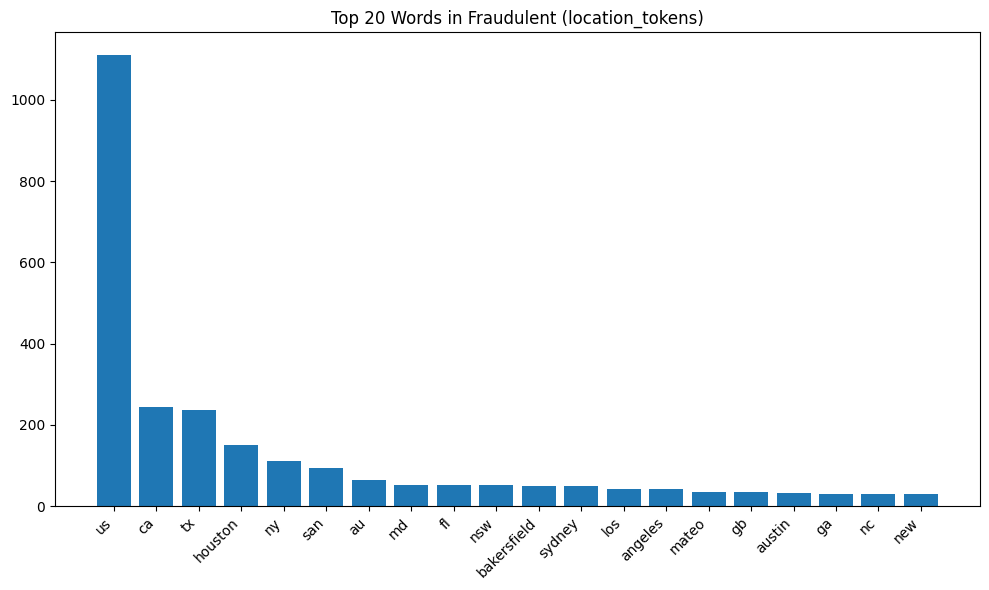

Processing column: descr_tokens


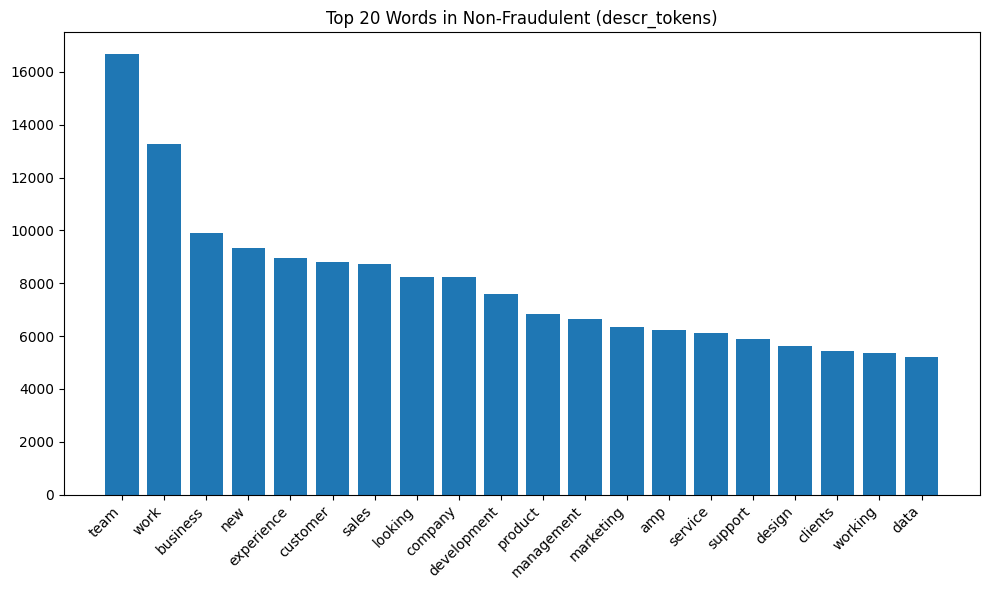

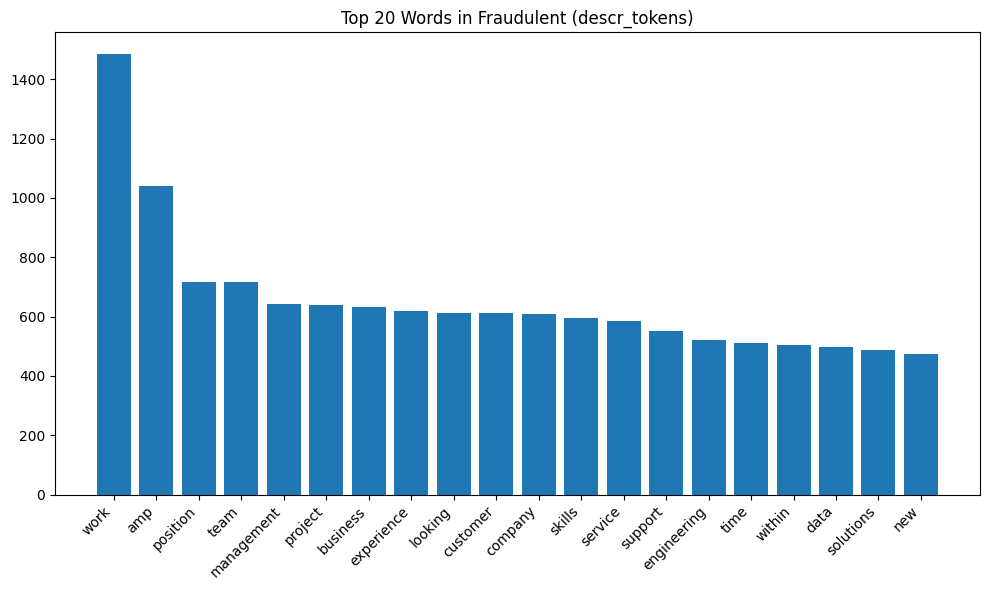

Processing column: requirement_tokens


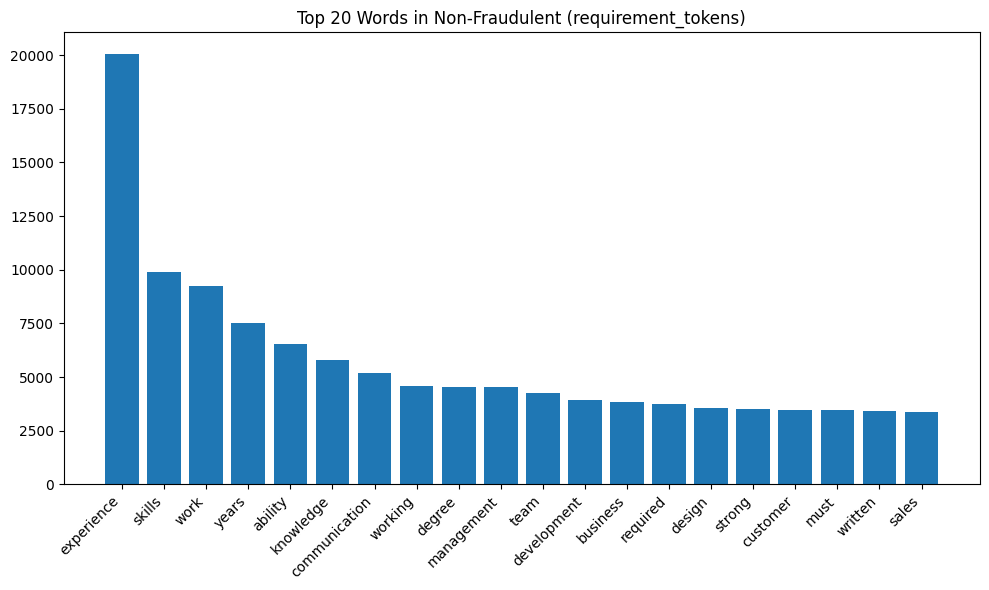

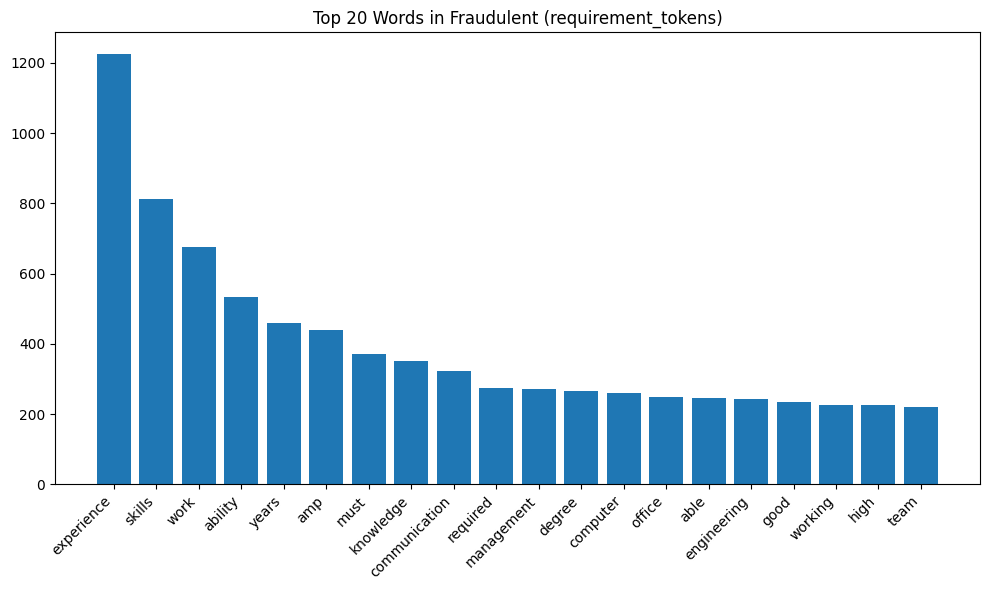

Processing column: descr_reqt_tokens


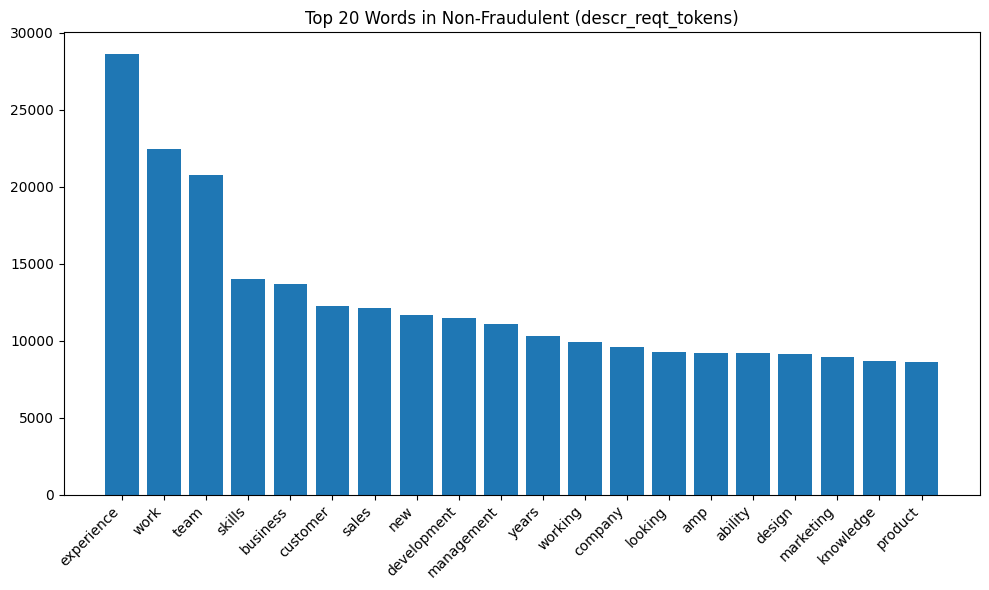

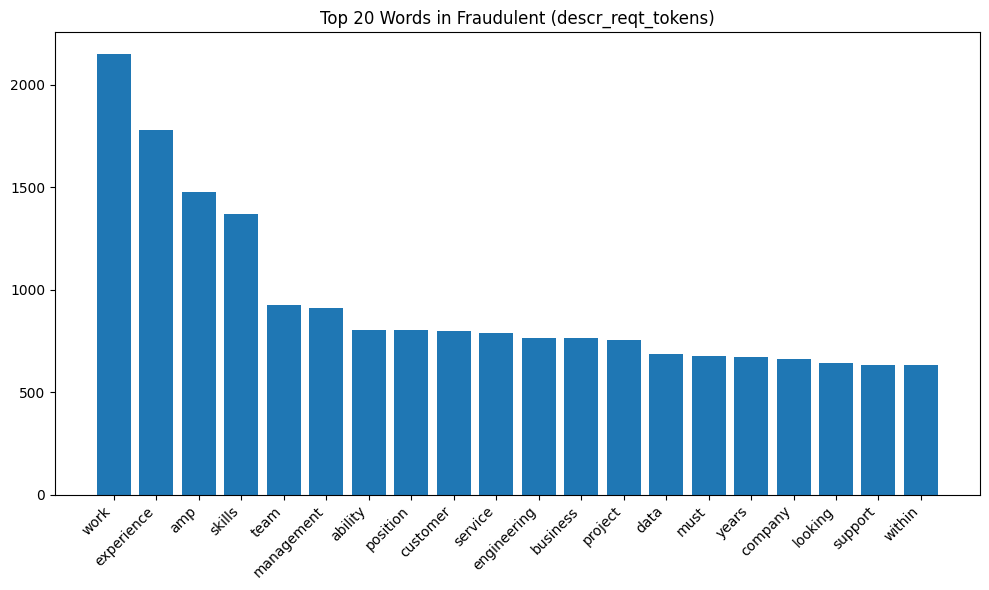

Processing column: country_state_tokens


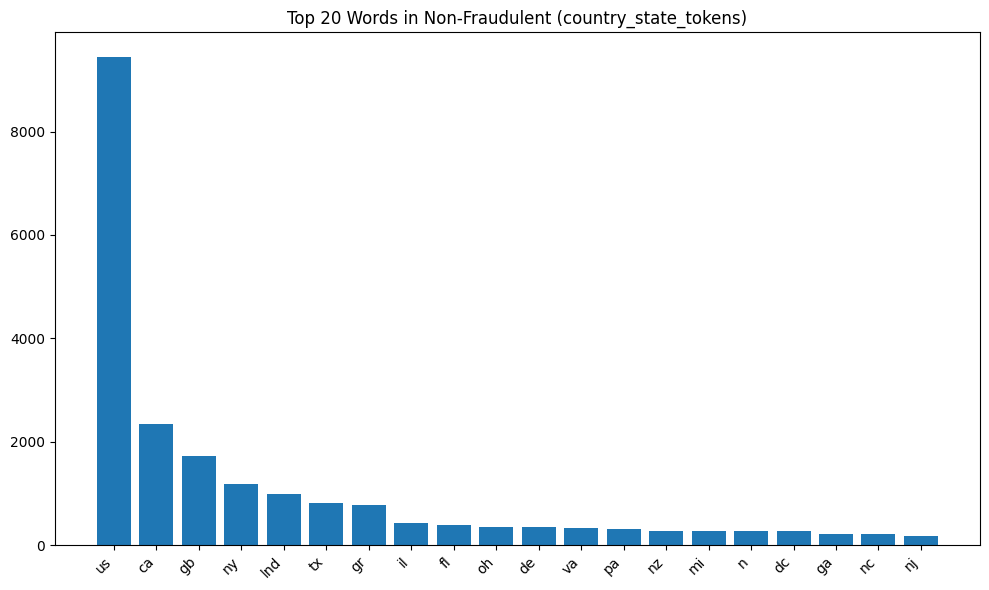

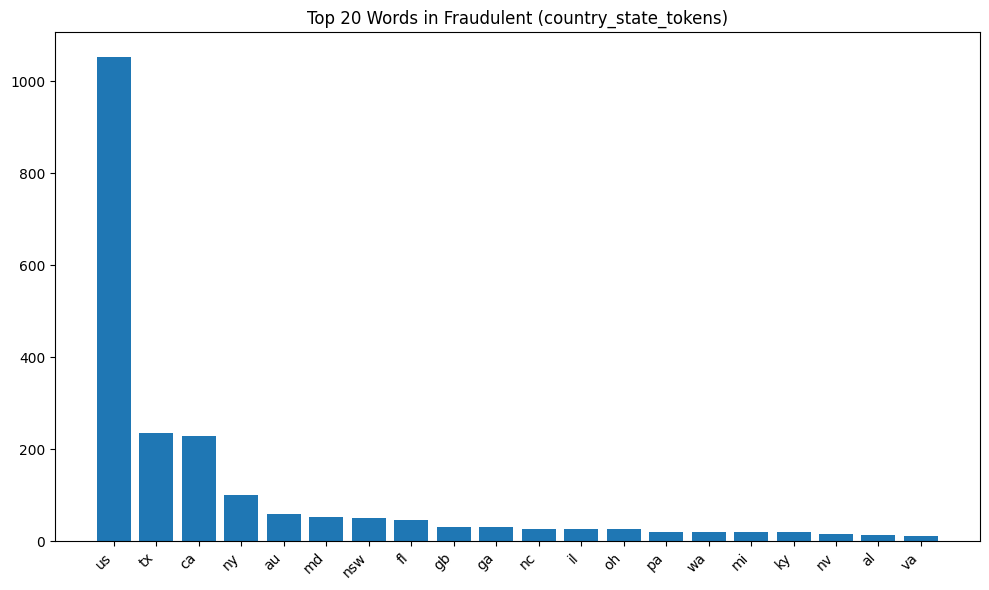

Processing column: country_tokens


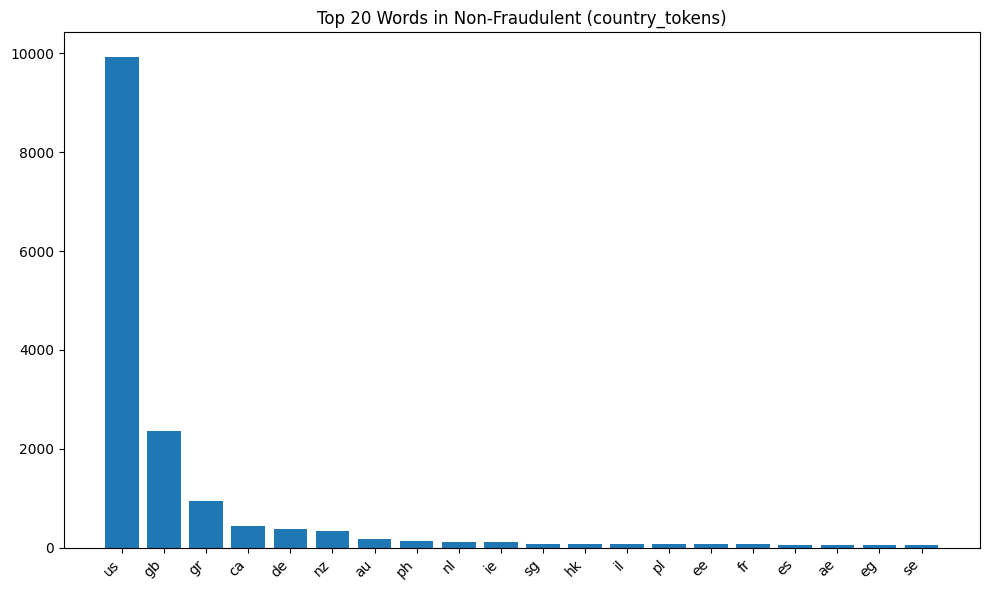

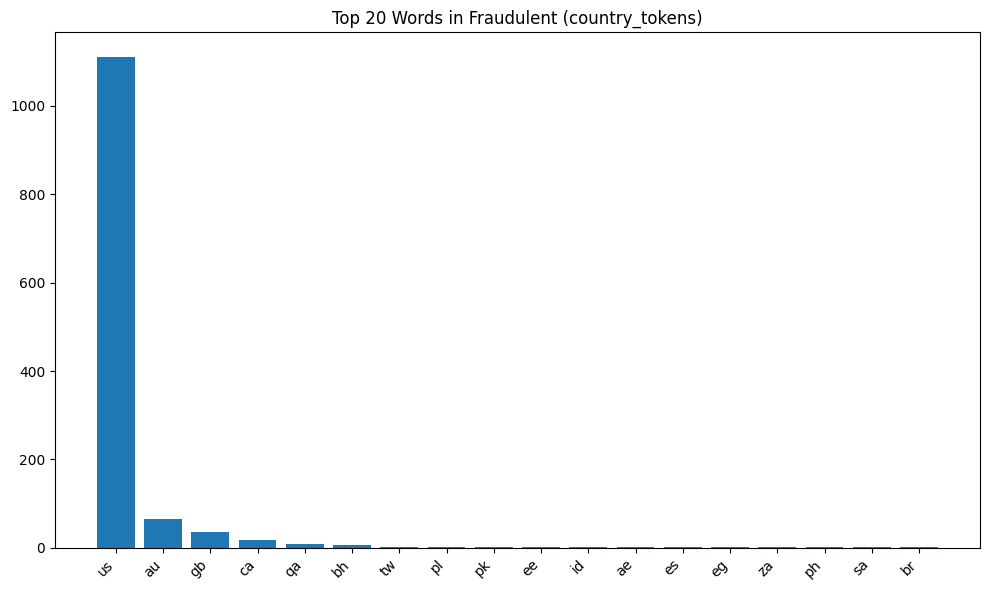

In [ ]:
# function to plot the top 20 words of a text-based column based on frequency
def plot_top_words(df_subset, token_col, title):
    all_tokens = [t for tokens in df_subset[token_col] for t in tokens]
    freq = Counter(all_tokens).most_common(20)
    freq_df = pd.DataFrame(freq, columns=['word', 'count'])

    plt.figure(figsize=(10, 6))
    plt.bar(freq_df['word'], freq_df['count'])
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# for loop to plot top words for fraudulent and non-fraudulent of each column
def plot_for_columns(df, columns):
    """
    columns: list of column names whose tokenized versions you want to analyze.
    Assumes each column already contains token lists (preprocessed).
    """
    for col in columns:
        # If the given columns contain raw text, preprocess here:
        # df[f"{col}_tokens"] = df[col].apply(preprocess)
        token_col = col  # if they are already token columns
        print(f"Processing column: {col}")

        subset_non = df[df['fraudulent'] == 0]
        subset_fraud = df[df['fraudulent'] == 1]

        plot_top_words(
            subset_non,
            token_col,
            f"Top 20 Words in Non-Fraudulent ({col})"
        )
        plot_top_words(
            subset_fraud,
            token_col,
            f"Top 20 Words in Fraudulent ({col})"
        )

plot_for_columns(df, cols)


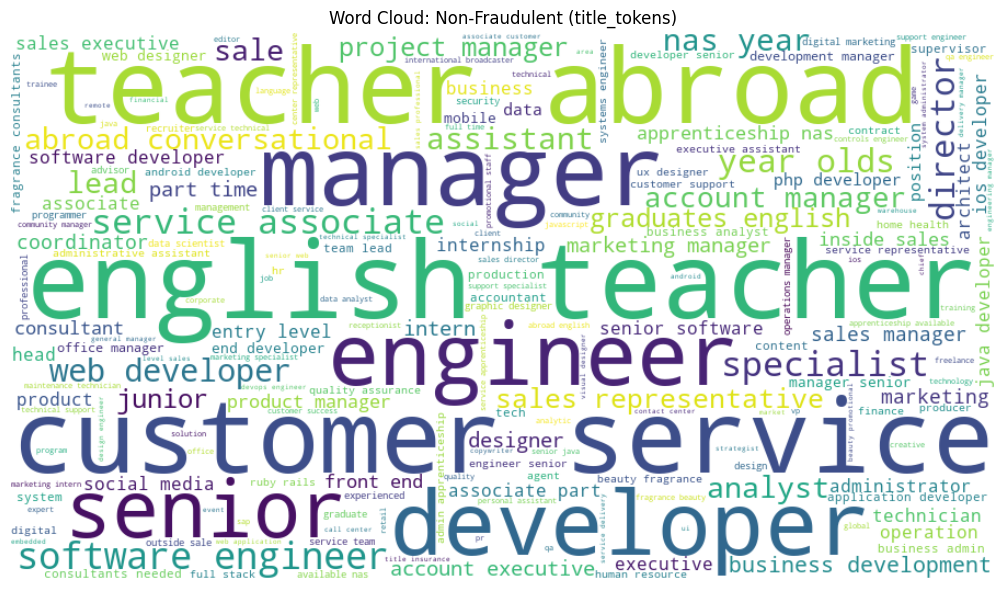

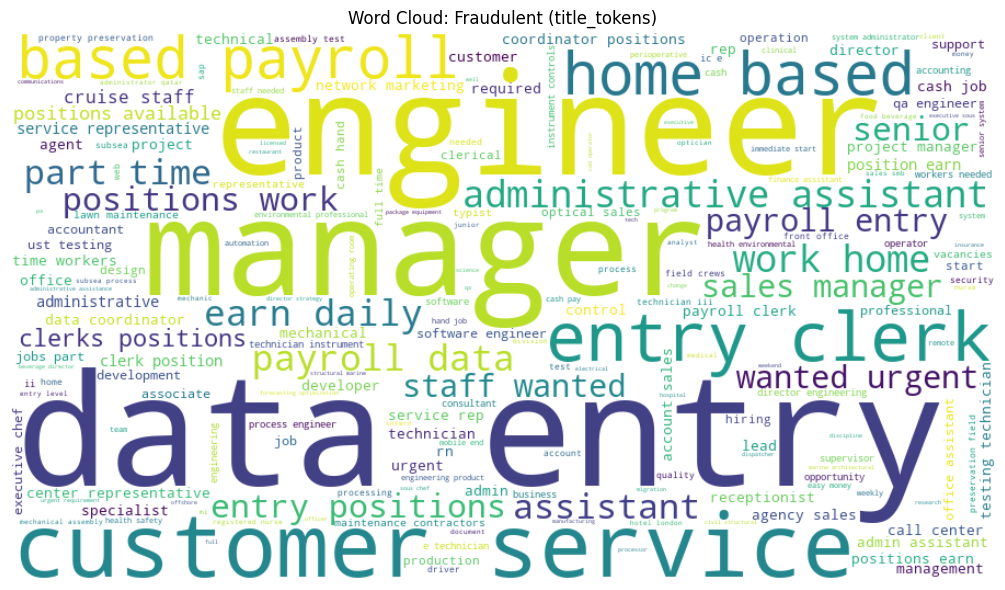

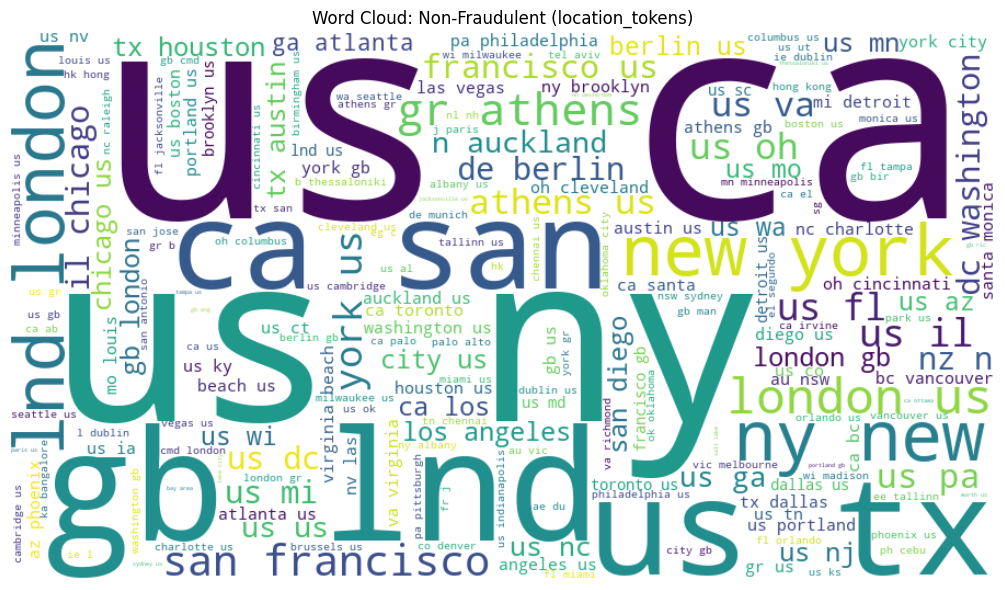

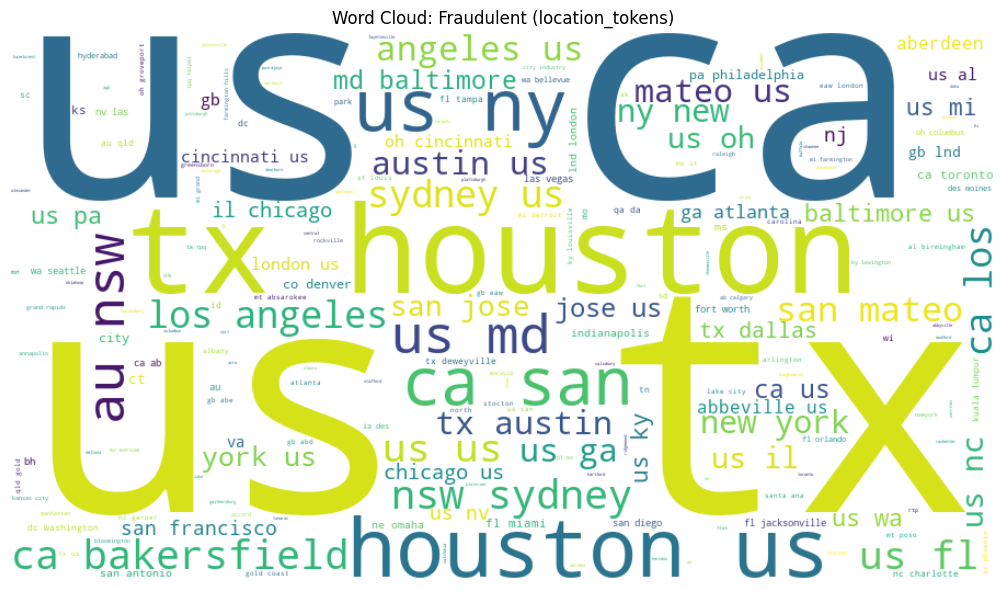

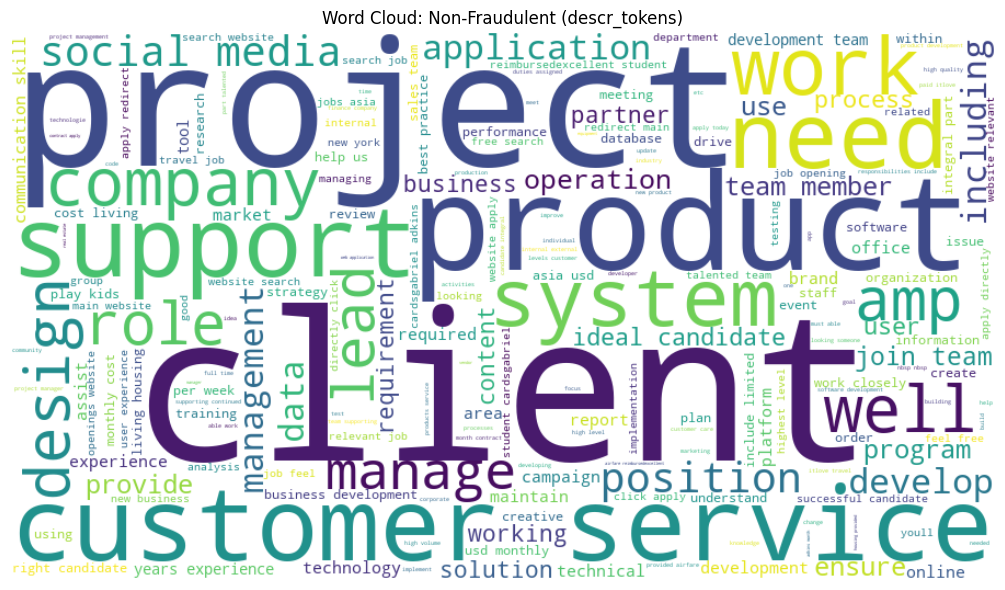

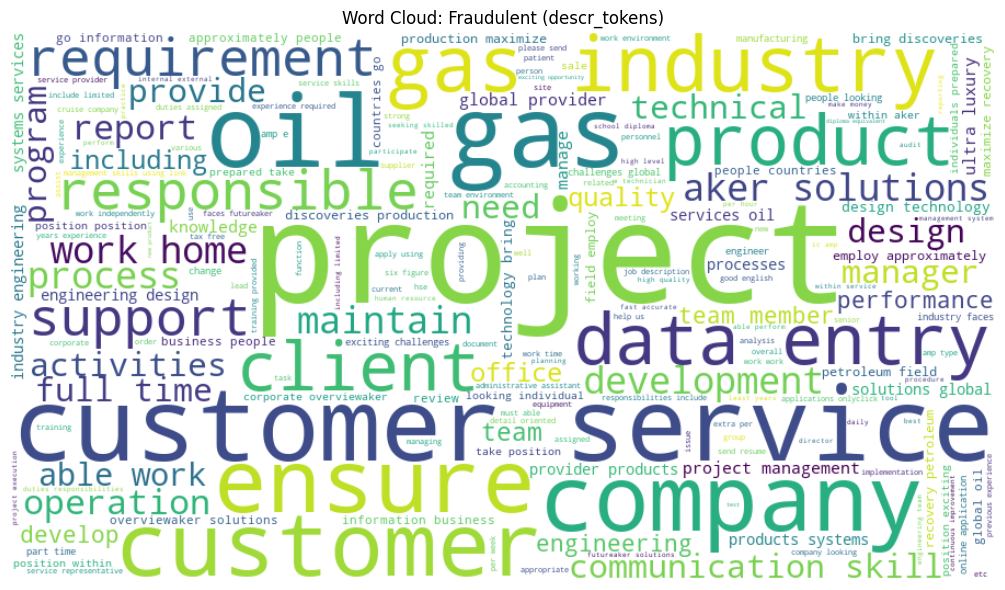

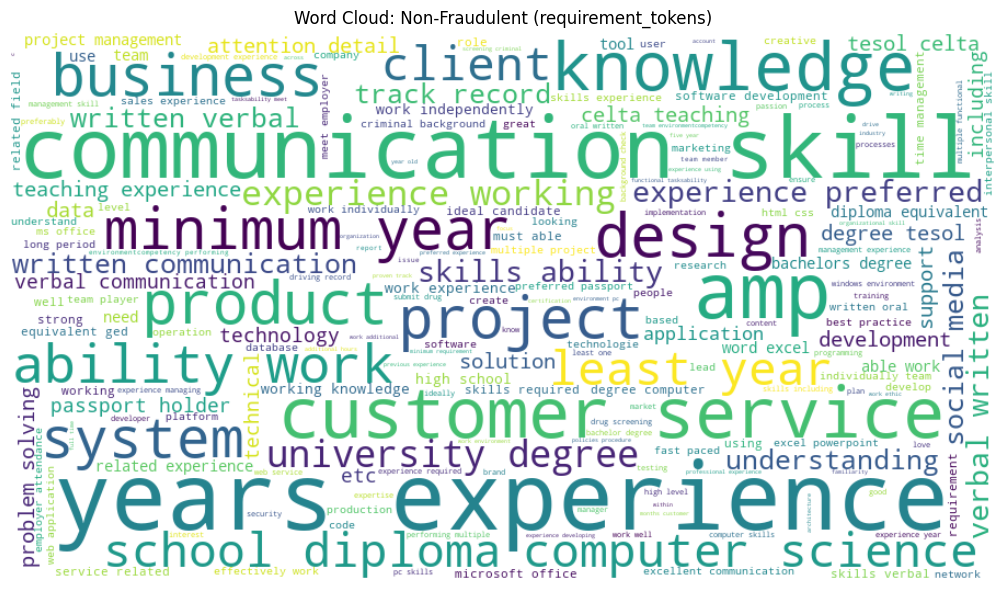

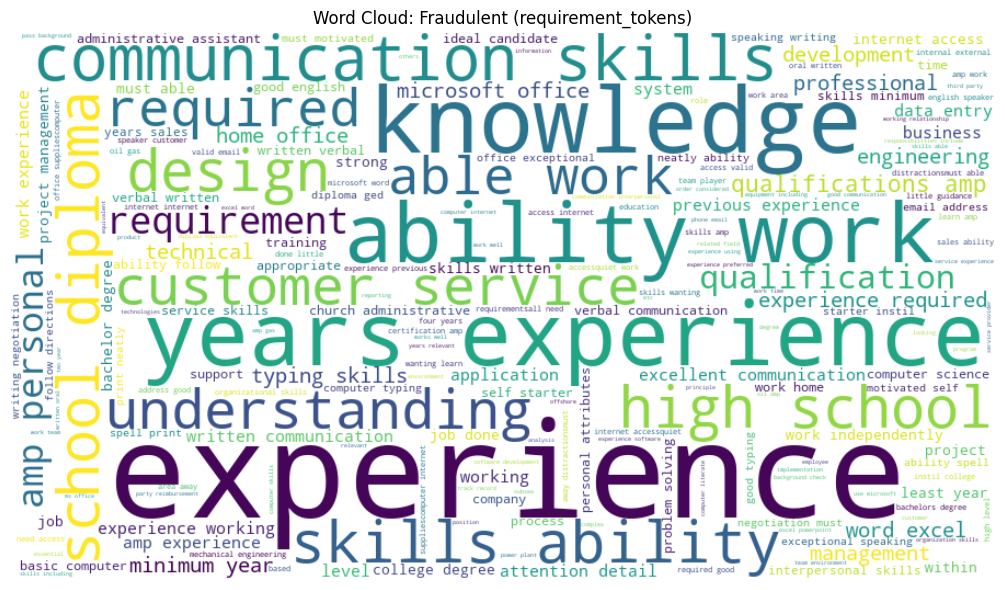

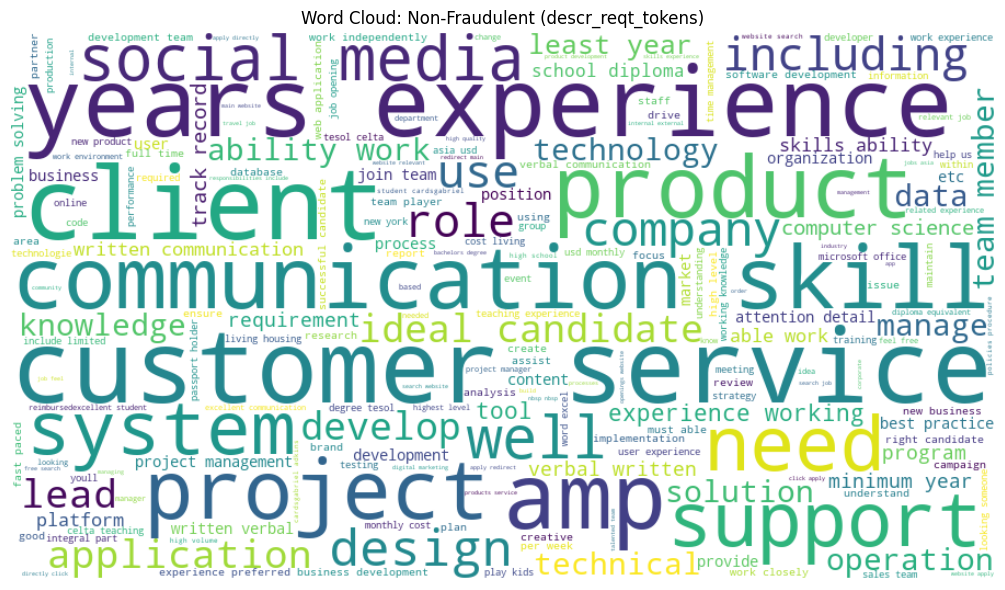

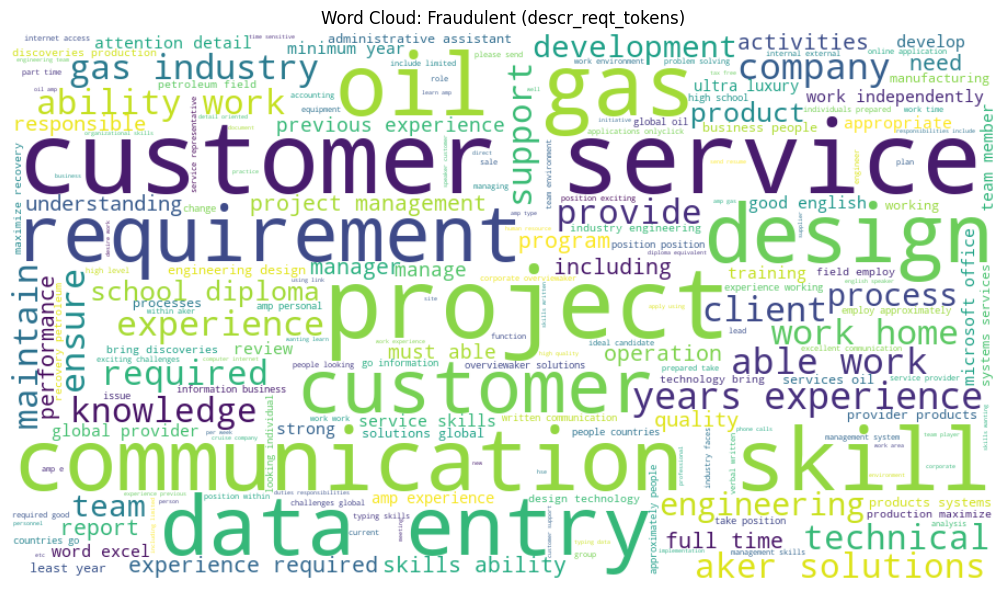

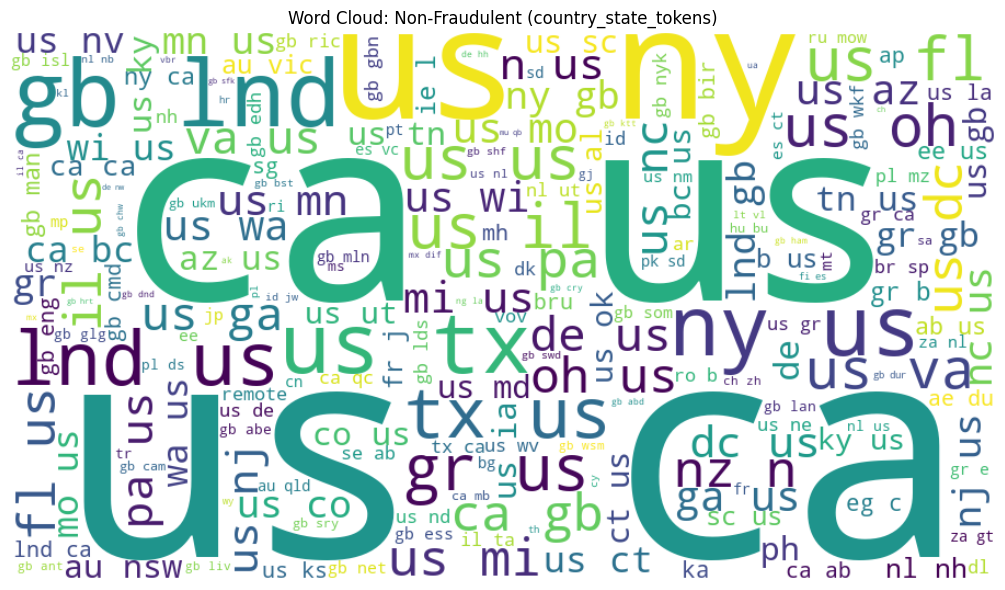

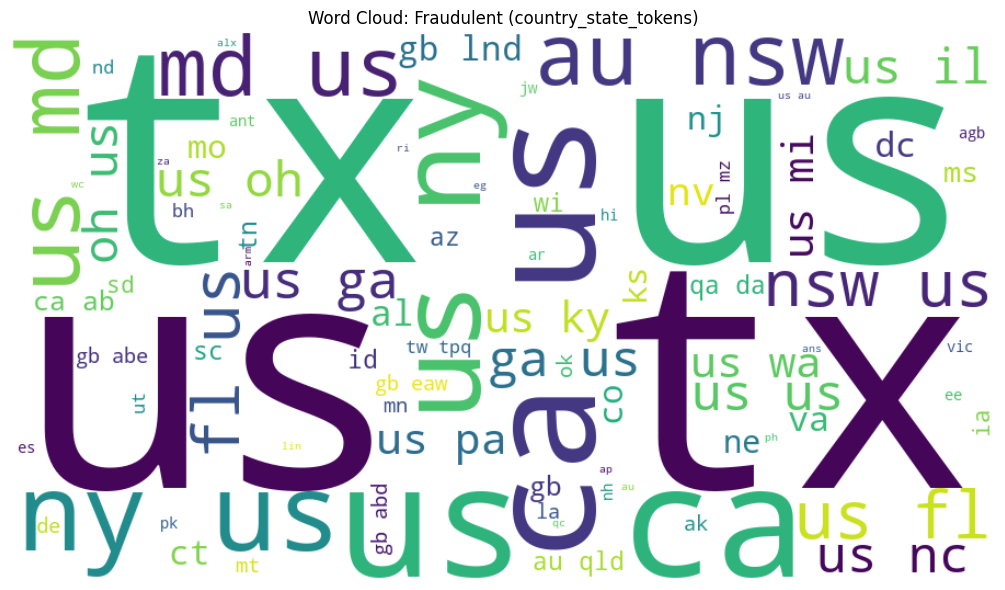

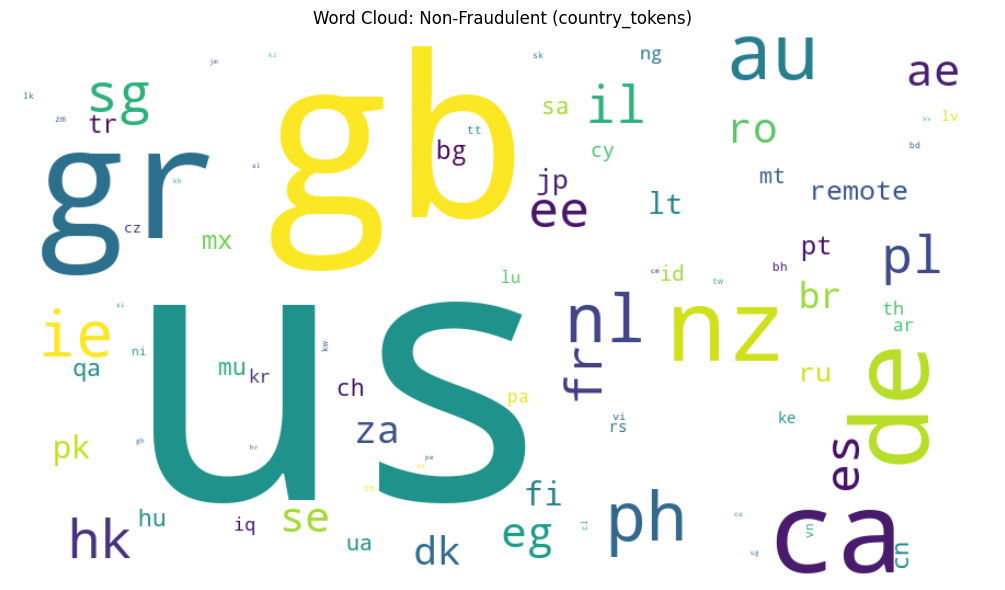

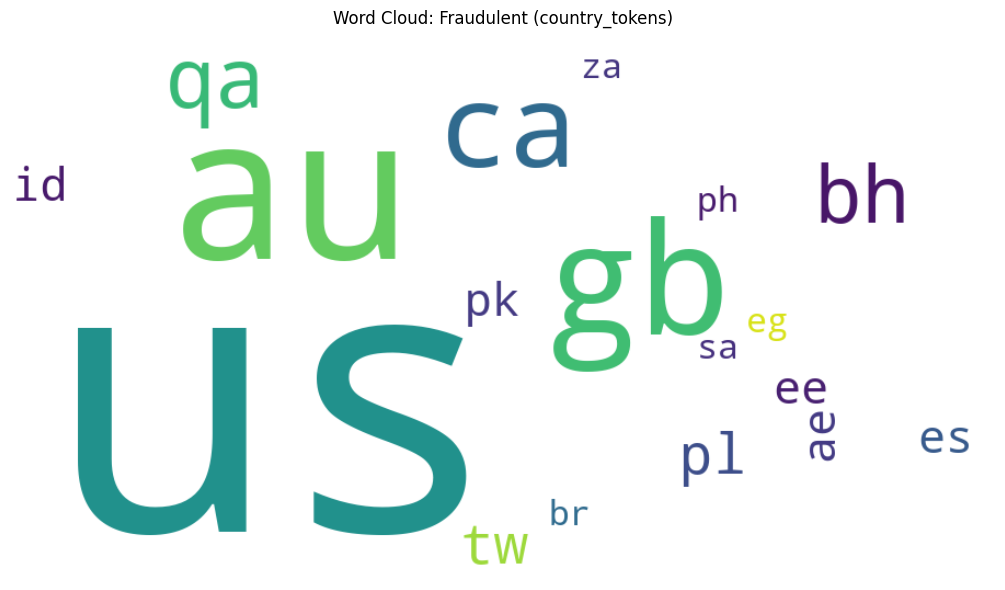

In [ ]:
# function to plot word cloud for column
def plot_wordcloud(df_subset, token_col, title):
    # Flatten all tokens into one list
    all_tokens = [t for tokens in df_subset[token_col] for t in tokens]
    text = " ".join(all_tokens)

    wc = WordCloud(
        width=900,
        height=500,
        background_color="white"
    ).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# loop through each text-based column and generate word cloud
for col in cols:
    plot_wordcloud(
        df[df['fraudulent'] == 0],
        token_col=col,
        title=f"Word Cloud: Non-Fraudulent ({col})"
    )

    plot_wordcloud(
        df[df['fraudulent'] == 1],
        token_col=col,
        title=f"Word Cloud: Fraudulent ({col})"
    )

telecommuting dtype: int64
telecommuting
0    17529
1      805
Name: count, dtype: int64
----------------------------------------
has_company_logo dtype: int64
has_company_logo
1    14378
0     3956
Name: count, dtype: int64
----------------------------------------
has_questions dtype: int64
has_questions
0    9417
1    8917
Name: count, dtype: int64
----------------------------------------
fraudulent dtype: int64
fraudulent
0    17014
1     1320
Name: count, dtype: int64
----------------------------------------
location_has_non_latin dtype: int64
location_has_non_latin
0    18232
1      102
Name: count, dtype: int64
----------------------------------------
description_has_non_latin dtype: int64
description_has_non_latin
1    14223
0     4111
Name: count, dtype: int64
----------------------------------------
requirements_has_non_latin dtype: int64
requirements_has_non_latin
1    9874
0    8460
Name: count, dtype: int64
----------------------------------------
has_requirements dtype: bo

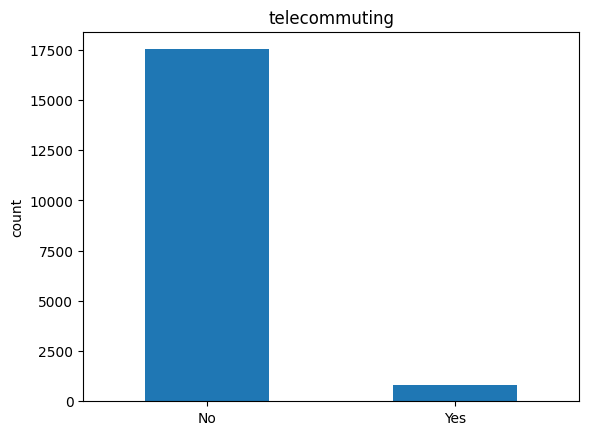

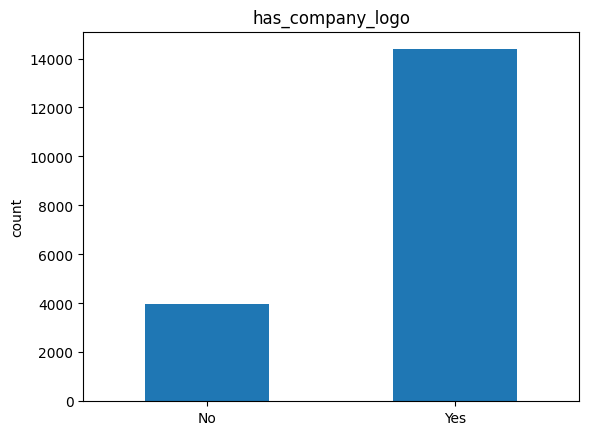

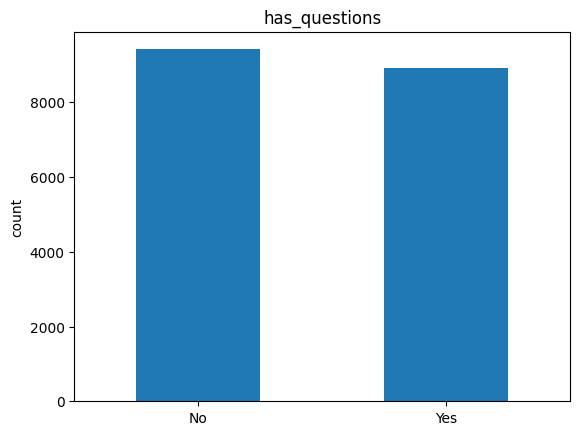

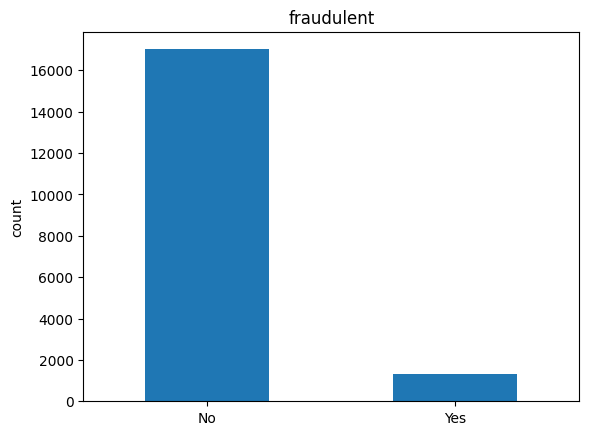

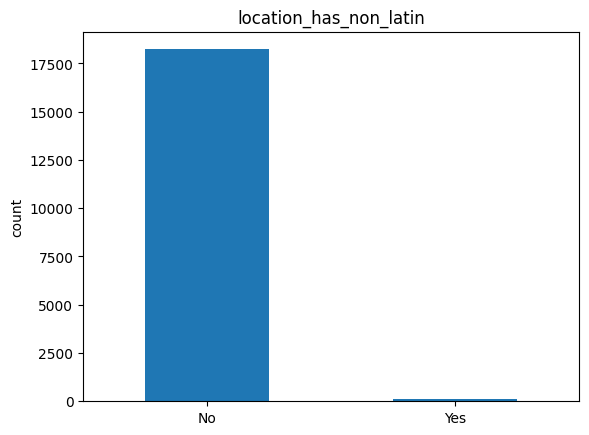

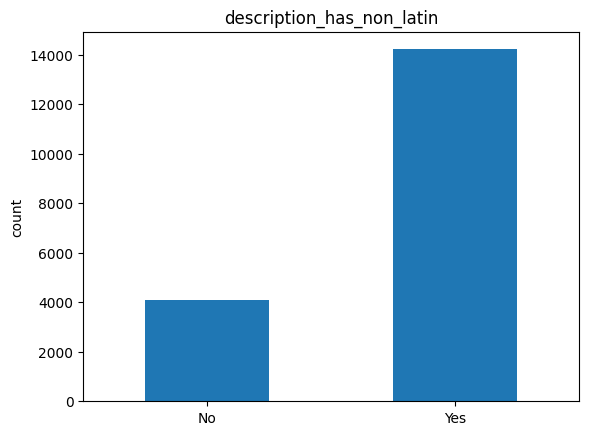

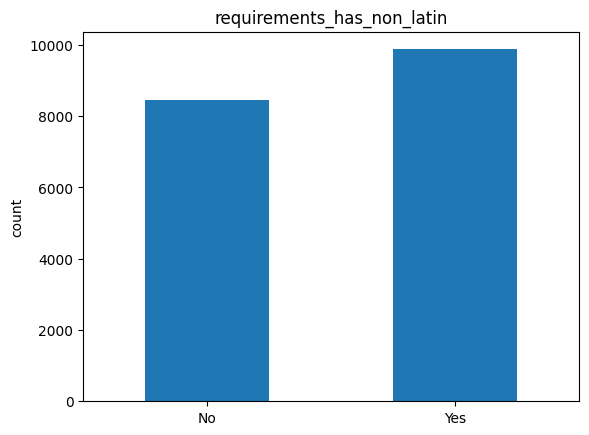

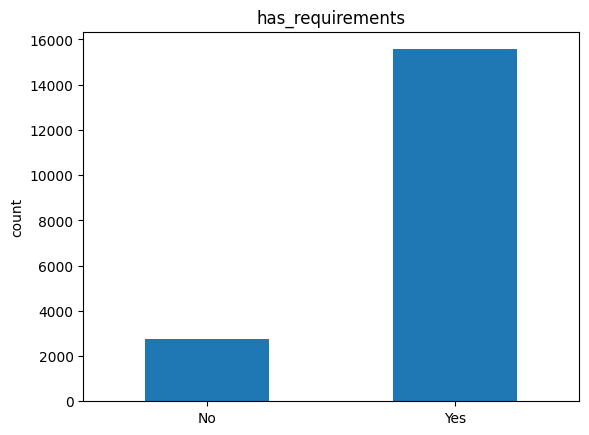

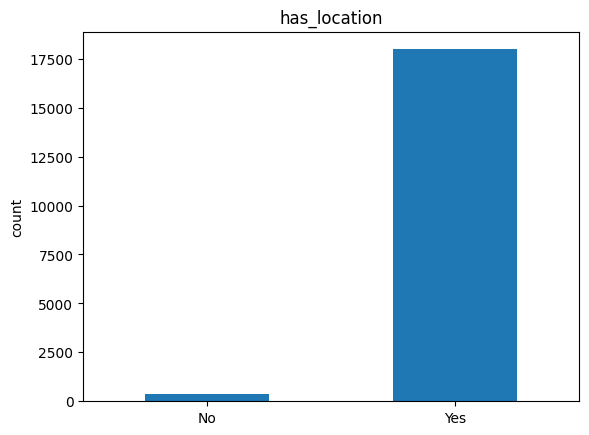

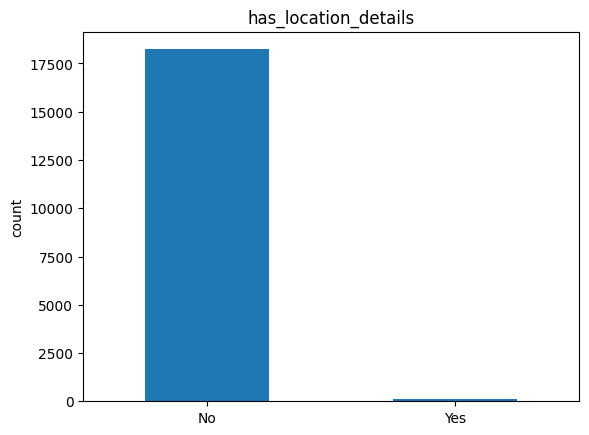

In [3]:
# Plot Binary Features

binary_cols = [
    "telecommuting",
    "has_company_logo",
    "has_questions",
    "fraudulent",
    "location_has_non_latin",
    "description_has_non_latin",
    "requirements_has_non_latin",
    "has_requirements",
    "has_location",
    "has_location_details"
]

# print value counts for each category
for c in binary_cols:
    print(c, "dtype:", df[c].dtype)
    print(df[c].value_counts(dropna=False))
    print("-" * 40)

# rename x labels to No and Yes for 0 and 1
rename_map = {0: "No", 1: "Yes"}

# loop to plot binary graphs
for c in binary_cols:
    counts = df[c].value_counts().sort_index()
    if set(counts.index).issubset({0, 1}):
        counts = counts.rename(index=rename_map)

    plt.figure() 
    counts.plot(kind="bar")
    plt.xlabel("")
    plt.ylabel("count")
    plt.title(c)
    plt.xticks(rotation=0)
    plt.show()
